In [4]:
import pandas as pd
import numpy as np
import nltk
import re
import os

# from textblob import TextBlob

from nltk.probability import FreqDist
freqdist = FreqDist()

from nltk.stem import WordNetLemmatizer
lemmatize = WordNetLemmatizer()

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

stop = stopwords.words('English')
from langdetect import detect
# os.chdir('..')
comm = pd.read_csv(os.path.join("Data", "Sunscreen_Comments_Full.csv")).iloc[:, 1:]
comm.Comment = comm.Comment.apply(lambda x: str(x)[1:-1])

FileNotFoundError: [Errno 2] No such file or directory: 'Data\\Sunscreen_Comments_Full.csv'

In [ ]:
import os 
os.getcwd()
os.chdir('Data')
os.listdir()

In [24]:
"this is a comment"

'this is a comment'

In [ ]:
from textblob import TextBlob
import pandas as pd
from langdetect import detect

In [3]:
comm = comm[(comm.Sentiment == 'Postive') | (comm.Sentiment == 'Negative')]

NameError: name 'comm' is not defined

In [ ]:
comm.head()

In [ ]:
comm.tail()

In [2]:
classify(TextBlob(comm['Comment'][20035]).sentiment.polarity)

NameError: name 'classify' is not defined

In [43]:
comm

,Product_ID,Comment,Rating,Sentiment
0,1058331261,i bought sunscreen watching review youtube dr ...,100.0,Postive
1,1058331261,you bet favorite sunscreen ever i bought 10 al...,100.0,Postive
2,1058331261,perfect summer sports also water resistant doe...,100.0,Postive
3,1058331261,i sensitive rosacea prone skin chemical sunscr...,100.0,Postive
4,1058331261,i love everything sunscreen alcohol free fragr...,100.0,Postive
...,...,...,...,...
20032,1077701949,living scotland i often require heavy spf dail...,80.0,Postive
20033,1077701949,product nice i actually used primer foundation...,80.0,Postive
20034,1077701949,a nice lightweight light cover primer spf i li...,40.0,Postive
20035,1077701949,even though quite thin still blend like bb cc ...,40.0,Postive


In [53]:
comm = pd.read_csv('Sunscreen_Comments_Full.csv').iloc[:, 1:]
comm.Comment = comm.Comment.apply(lambda x: x[1:-1])

In [54]:
def get_english(c):
    try: 
        return detect(c) == 'en'
    except: 
        return False

In [55]:
new_comm = comm[comm.Comment.apply(lambda x: get_english(x))]

In [56]:
new_comm = new_comm.reset_index().iloc[:, 1:]

In [57]:
def classify(polarity):
    if polarity == 0:
        return 'Neutral'
    elif polarity <= 1 and polarity > 0:
        return 'Positive'
    else:
        return 'Negative'

desig = []

for comment in new_comm['Comment']:
    try:
        if detect(comment) == 'en':
            pol = TextBlob(comment).sentiment.polarity
            desig.append(classify(pol))
        else:
            desig.append('Unknown')
    except:
        desig.append('Unknown')
        continue

new_comm['Sentiment'] = desig


In [58]:
def rating_to_dummy(rating): 
    if 100 >= rating > 60:
        return 1
    elif 40 >= rating >= 0: 
        return 0
    else: 
        return 'Delete'

In [59]:
new_comm['Actual_Sentiment'] = new_comm.Rating.apply(lambda x: rating_to_dummy(x))

In [60]:
def pred_sentiment_to_dummy(sent): 
    if sent == 'Positive': 
        return 1
    if sent == 'Negative': 
        return 0

In [71]:
new_comm['Pred_Sentiment'] = new_comm.Sentiment.apply(lambda x: pred_sentiment_to_dummy(x))

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
from sklearn.metrics import classification_report,confusion_matrix 

In [78]:
# new_comm.Pred_Sentiment.apply(lambda x: int(x) )

In [82]:
new_comm = new_comm[new_comm.Pred_Sentiment.notna()]
new_comm = new_comm[new_comm.Actual_Sentiment.notna()]

In [92]:
new_comm = new_comm[new_comm.Actual_Sentiment != 'Delete']

In [102]:
new_comm['Pred_Sentiment'] = new_comm.Pred_Sentiment.apply(lambda x: int(x))

C:\Users\shiva\AppData\Local\Temp\ipykernel_12436\2887901114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_comm['Pred_Sentiment'] = new_comm.Pred_Sentiment.apply(lambda x: int(x))


In [103]:
y_true, y_pred = new_comm['Actual_Sentiment'], new_comm['Pred_Sentiment']

In [111]:
y_pred = y_pred.astype(object)

In [115]:
conf_test = pd.DataFrame([y_true, y_pred]).transpose()

In [117]:
conf_test

,Actual_Sentiment,Pred_Sentiment
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
20663,1,1
20664,1,1
20665,0,1
20666,0,1


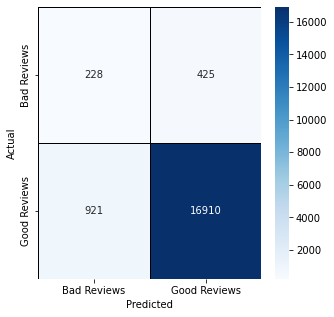

In [119]:
cm = confusion_matrix(conf_test.Actual_Sentiment, conf_test.Pred_Sentiment)
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Bad Reviews','Good Reviews'], 
            yticklabels = ['Bad Reviews','Good Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual");